**GRIPJUNE2023 @ The Sparks Foundation Internship**

**Author:** MARY HEAVEN J

**Internship in DATA SCIENCE AND BUSINESS ANALYTICS**

**Task 2: Prediction using Unsupervised Machine Learning**

In [ ]:
!pip install pyspark

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("KMeans Model").getOrCreate()

In [4]:
data = spark.read.csv('/content/drive/MyDrive/TSF-Internship/Iris.csv',header = True, inferSchema = True)

In [5]:
data.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- SepalLengthCm: double (nullable = true)
 |-- SepalWidthCm: double (nullable = true)
 |-- PetalLengthCm: double (nullable = true)
 |-- PetalWidthCm: double (nullable = true)
 |-- Species: string (nullable = true)



In [6]:
data.show(10)

+---+-------------+------------+-------------+------------+-----------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|
+---+-------------+------------+-------------+------------+-----------+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|
|  5|          5.0|         3.6|          1.4|         0.2|Iris-setosa|
|  6|          5.4|         3.9|          1.7|         0.4|Iris-setosa|
|  7|          4.6|         3.4|          1.4|         0.3|Iris-setosa|
|  8|          5.0|         3.4|          1.5|         0.2|Iris-setosa|
|  9|          4.4|         2.9|          1.4|         0.2|Iris-setosa|
| 10|          4.9|         3.1|          1.5|         0.1|Iris-setosa|
+---+-------------+------------+-------------+------------+-----

In [7]:
data.describe().show()

+-------+------------------+------------------+-------------------+------------------+------------------+--------------+
|summary|                Id|     SepalLengthCm|       SepalWidthCm|     PetalLengthCm|      PetalWidthCm|       Species|
+-------+------------------+------------------+-------------------+------------------+------------------+--------------+
|  count|               150|               150|                150|               150|               150|           150|
|   mean|              75.5| 5.843333333333335| 3.0540000000000007|3.7586666666666693|1.1986666666666672|          null|
| stddev|43.445367992456916|0.8280661279778637|0.43359431136217375| 1.764420419952262|0.7631607417008414|          null|
|    min|                 1|               4.3|                2.0|               1.0|               0.1|   Iris-setosa|
|    max|               150|               7.9|                4.4|               6.9|               2.5|Iris-virginica|
+-------+------------------+----

In [8]:
data.columns

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [9]:
data.count()

150

In [10]:
data=data.withColumnRenamed('SepalLengthCm','sepal_length').withColumnRenamed('SepalWidthCm','sepal_width').withColumnRenamed('PetalLengthCm','petal_length').withColumnRenamed( 'PetalWidthCm','petal_width')

In [11]:
data.columns

['Id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Species']


**DATA PREPROCESSING**

In [12]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer

In [13]:
featurecols=["sepal_length", "sepal_width", "petal_length", "petal_width"]
assembler = VectorAssembler(inputCols =featurecols,outputCol='features')
output=assembler.transform(data)

In [14]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

Silhouette Method

In [15]:

evaluator = ClusteringEvaluator(featuresCol='features', \
metricName='silhouette', distanceMeasure='squaredEuclidean')


In [16]:
silhouette_scores=[]
for K in range(2,11):

    kmeans=KMeans(featuresCol='features', k=K)

    KMeans_fit=kmeans.fit(output)

    KMeans_transform=KMeans_fit.transform(output)

    evaluation_score=evaluator.evaluate(KMeans_transform)

    silhouette_scores.append(evaluation_score)
    print("Silhouette Score:","K=",K,evaluation_score)

Silhouette Score: K= 2 0.8501515983265806
Silhouette Score: K= 3 0.7342113066202725
Silhouette Score: K= 4 0.6766249818097015
Silhouette Score: K= 5 0.5576115172427016
Silhouette Score: K= 6 0.5383681330070867
Silhouette Score: K= 7 0.5361146249783653
Silhouette Score: K= 8 0.5106105909110993
Silhouette Score: K= 9 0.4833803518449607
Silhouette Score: K= 10 0.4528314134292826


Text(0, 0.5, 'Silhouette Score')

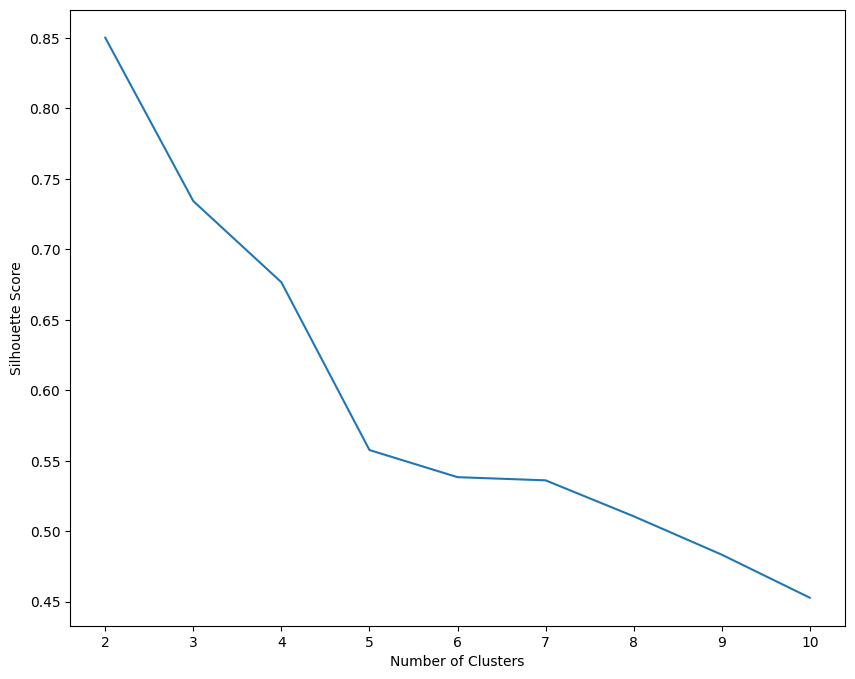

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(10,8))
ax.plot(range(2,11),silhouette_scores)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')

In [18]:
kmeans=KMeans(featuresCol='features', k=3)
KMeans_Model=kmeans.fit(output)
KMeans_Assignments=KMeans_Model.transform(output)
KMeans_Assignments.show()

+---+------------+-----------+------------+-----------+-----------+-----------------+----------+
| Id|sepal_length|sepal_width|petal_length|petal_width|    Species|         features|prediction|
+---+------------+-----------+------------+-----------+-----------+-----------------+----------+
|  1|         5.1|        3.5|         1.4|        0.2|Iris-setosa|[5.1,3.5,1.4,0.2]|         0|
|  2|         4.9|        3.0|         1.4|        0.2|Iris-setosa|[4.9,3.0,1.4,0.2]|         0|
|  3|         4.7|        3.2|         1.3|        0.2|Iris-setosa|[4.7,3.2,1.3,0.2]|         0|
|  4|         4.6|        3.1|         1.5|        0.2|Iris-setosa|[4.6,3.1,1.5,0.2]|         0|
|  5|         5.0|        3.6|         1.4|        0.2|Iris-setosa|[5.0,3.6,1.4,0.2]|         0|
|  6|         5.4|        3.9|         1.7|        0.4|Iris-setosa|[5.4,3.9,1.7,0.4]|         0|
|  7|         4.6|        3.4|         1.4|        0.3|Iris-setosa|[4.6,3.4,1.4,0.3]|         0|
|  8|         5.0|        3.4|

In [19]:
from pyspark.ml.feature import PCA as PCAml
pca = PCAml(k=2, inputCol="features", outputCol="pca")
pca_model = pca.fit(output)
pca_transformed = pca_model.transform(output)
pca_transformed.show(5,False)

+---+------------+-----------+------------+-----------+-----------+-----------------+----------------------------------------+
|Id |sepal_length|sepal_width|petal_length|petal_width|Species    |features         |pca                                     |
+---+------------+-----------+------------+-----------+-----------+-----------------+----------------------------------------+
|1  |5.1         |3.5        |1.4         |0.2        |Iris-setosa|[5.1,3.5,1.4,0.2]|[-2.8271359726790286,-5.641331045573357]|
|2  |4.9         |3.0        |1.4         |0.2        |Iris-setosa|[4.9,3.0,1.4,0.2]|[-2.795952482148846,-5.145166883252942] |
|3  |4.7         |3.2        |1.3         |0.2        |Iris-setosa|[4.7,3.2,1.3,0.2]|[-2.62152355816506,-5.17737812120394]   |
|4  |4.6         |3.1        |1.5         |0.2        |Iris-setosa|[4.6,3.1,1.5,0.2]|[-2.764905900474242,-5.003599415056977] |
|5  |5.0         |3.6        |1.4         |0.2        |Iris-setosa|[5.0,3.6,1.4,0.2]|[-2.782750115951662,-5.648

In [20]:
import numpy as np
x_pca = np.array(pca_transformed.rdd.map(lambda row: row.pca).collect())
print(x_pca[:5])

[[-2.82713597 -5.64133105]
 [-2.79595248 -5.14516688]
 [-2.62152356 -5.17737812]
 [-2.7649059  -5.00359942]
 [-2.78275012 -5.64864829]]


In [21]:
cluster_assignment = np.array(KMeans_Assignments.rdd.map(lambda row: row.prediction).collect()).reshape(-1,1)
print(cluster_assignment[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [22]:
pca_data = np.hstack((x_pca,cluster_assignment))
print(pca_data[:4])

[[-2.82713597 -5.64133105  0.        ]
 [-2.79595248 -5.14516688  0.        ]
 [-2.62152356 -5.17737812  0.        ]
 [-2.7649059  -5.00359942  0.        ]]


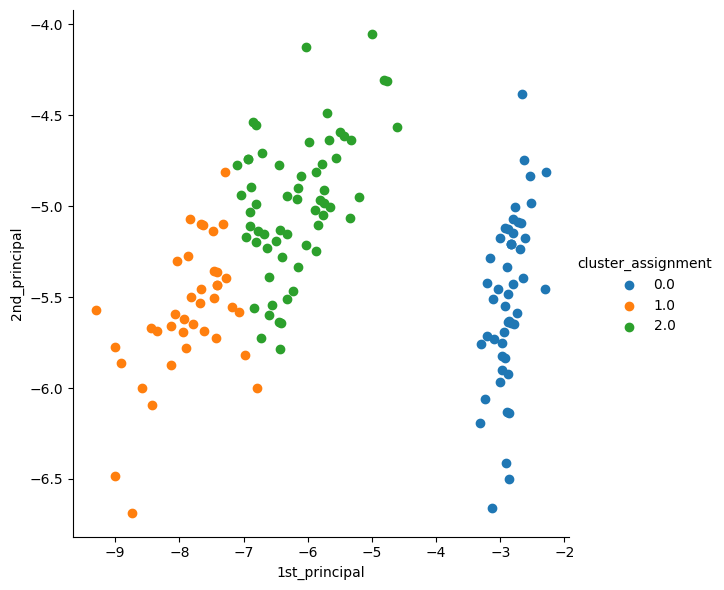

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal","cluster_assignment"))
sns.FacetGrid(pca_df,hue="cluster_assignment", height=6).map(plt.scatter, '1st_principal', '2nd_principal' ).add_legend()

plt.show()